# Algoritmo Genético

In [1]:
import numpy as np
import random as ran
import networkx as nx
import matplotlib.pyplot

**Primero vamos a Generar una poblacion de n individuos, donde cada individuo es un arreglo de bits**

nota: el numero de bits ya viene definido abajo, y deben ser igual al numero de vertices de la grafica

nota2 : recordemos que un individuo es un candidato para ser nuestro conjunto optimo

In [9]:
def generar_poblacion(n):
    poblacion=[[ran.randint(0,1) for i in range(bits)] for i in range(n)]
    return poblacion


In [65]:
#ejemplo de la poblacion 
a=generar_poblacion(pob)
print(a)

[[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1], [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 

**Definimos una funcion cardinalida, la cual nos regresa el conjunto de vertices de la cardinalidad del individuo**

In [11]:
def cardinalidad(individuo):
    conjunto=[]
    for i in range(len(individuo)):
        if individuo[i] == 1:
            conjunto.append(i)
        else:
            pass
    return  conjunto

In [70]:
#ejemplo del conjunto cardinal del primer individuo del ejemplo de poblacion anterior
b=cardinalidad(a[0])
print(b)

[1, 2, 4, 10, 13, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 30, 32, 33, 34, 35, 37, 38, 39, 41, 42, 43, 47, 49, 50, 53, 54, 55, 56, 58, 59, 63, 66, 67, 68, 69, 71, 72, 77, 80, 81, 83, 84, 85, 87, 88, 90, 94, 95, 97, 100, 101, 103, 105, 108, 109, 111, 112, 117, 126, 127, 129, 134, 135, 136, 137, 138, 141, 143, 145, 146, 149, 159, 161, 163, 165, 166, 168, 170, 171, 172, 174, 175, 176, 177, 178, 182, 184, 189, 193, 195, 196, 197, 198, 200, 201, 204, 207, 208, 211, 212, 213, 214, 215, 216, 218, 220, 226, 227, 230, 232, 235, 236, 238, 240, 242, 243, 247, 248, 250, 254, 258, 260, 261, 262, 263, 267, 268, 269, 273, 274, 279, 282, 284, 288, 289, 290, 291, 293, 296, 299, 300, 301, 302, 306, 307, 309, 310, 311]


**Definimos la funcion cobertura que recibe la matriz de adyacencia de la grafica que queremos optimizar, y a un individuo de la poblacion. Esta funcion nos regresa la cobertura que tiene el individuo**


In [71]:
def cobertura(M , individuo):
    multiplicacion=[]
    cobertura=0
    multiplicacion=individuo.dot(M)
    for i in range(len(multiplicacion)):
        if multiplicacion[i] != 0:
            cobertura=cobertura+1
    return cobertura

In [72]:
#la matriz que ocuparemos para el ejemplo esta definifa abajo
#es importante poner el np.array() para poder usar la funcion de .dot, esta ultima nos ayuda a hacer el
#producto punto de vector por matriz
c=cobertura(m,np.array(a[0]))
c

310

**Definimos nuestra funcion de fitness, la cual es la division de la cobertura entre la longitud del conjunto cardinal**

In [99]:
def f(cardinalidad,cobertura):
    cardinalidad=len(cardinalidad)
    return cobertura/cardinalidad

In [100]:
""" para este ejemplo usamos la cardinalidad y cobertuira de los ejemplos anteriores (la cardinalidad y
y cobertura del primer elemento de nuestra poblacion ejemplo)
"""
d=f(b,c)
d

2.026143790849673

**Ahora definimos la función para evaluar la poblacion, esta nos regresa un arreglo con la evaluacion de casa individuo de la poblacion en el orden en que estan**

Nota: la evaluacion se hace respecto a la función de fitness

In [101]:
def poblacion_evaluada(poblacion):
    pob_eva=[]
    for i in poblacion:
        k=cardinalidad(i)
        c=cobertura(m,np.array(i))
        if len(k) == 0:
            pob_eva.append(0)
        else:
            pob_eva.append(f(k,c))
    return pob_eva


In [102]:
# Evaluanmos nuestra poblacion ejemplo
e=poblacion_evaluada(a)
e

[1.9622641509433962,
 1.937888198757764,
 2.0326797385620914,
 1.8622754491017963,
 2.026143790849673,
 1.8902439024390243,
 1.8674698795180722,
 1.9493670886075949,
 2.1027397260273974,
 1.9869281045751634]

**Ahora vamos a utilizar el algoritmo de la burbuja para ordenar nuestra poblacion tomando 2 criterios, el primero es que la la cobertura sea la mayor y en caso que se tenga la misma cobertura, se pide que la cardinalidad sea la menor.**

**Definimos la fuincion ordenar1 la cual pide como entrada el arreglo de la poblacion y el de la poblacion evaluada y nos regresa dos arreglos, el arreglo de la poblacion y el de la poblacion evaluda ordenados de tal manera que coincidan el individuo con su evaluacion**

In [77]:
def ordenar1(poblacion, evaluada):
    for i in range(20):
        for j in range(len(poblacion)-1):
            k =len(cardinalidad(poblacion[j]))
            c =cobertura(m,np.array(poblacion[j]))
            k1=len(cardinalidad(poblacion[j+1]))
            c1=cobertura(m,np.array(poblacion[j+1]))
            if c > c1:
                pass
            elif c == c1:
                if k < k1:
                    pass
                else:
                    a=poblacion[j]
                    b=poblacion[j+1]
                    a1=evaluada[j]
                    b1=evaluada[j+1]
                    poblacion[j]=b
                    poblacion[j+1]=a
                    evaluada[j]= b1
                    evaluada[j+1]=a1   
            else:
                a=poblacion[j]
                b=poblacion[j+1]
                a1=evaluada[j]
                b1=evaluada[j+1]
                poblacion[j]=b
                poblacion[j+1]=a
                evaluada[j]= b1
                evaluada[j+1]=a1
    return poblacion, evaluada


In [78]:
""" Dado que la funcion nos regresa 2 arreglos es necesario utilizar 2 variables donde se almacenaran
estos arrglos, python nos facilita estos pudiendo poner las variables de la sig forma: f,g = ordenar1...
y automaticamente en f se guardara el primer arreglo que regresa la funcion ordenar1 y en g el segundo
"""
f,g=ordenar1(a,e)
print("esto es f: ",f)
print("esto es g: ",g)

esto es f:  [[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 

**Ahora definimos la funcion de clonacion la cual toma como parametro el tamaño de la poblacion y nos regresa un arreglo de indicadores que nos dira cuantas veces se tienen que mutar los individuos**

In [34]:
def fun_clones(tamañopob):
    k=3
    n=tamañopob
    fun_clon=[]
    for i in range(n):
        r = i / (n-1)
        fun_clon.append(k * ((1 - r)**(k-1)))
    return fun_clon

In [79]:
#el operador len() nos da la longitud de un arreglo
fun_clones(len(a))

[3.0,
 2.3703703703703702,
 1.8148148148148149,
 1.3333333333333335,
 0.925925925925926,
 0.5925925925925926,
 0.33333333333333337,
 0.14814814814814814,
 0.03703703703703707,
 0.0]

**Definimos la funcion de clones, la cual toma como parametros a la poblacion ordenada, y nos regresa una nueva poblacion que se conforma de clones de la poblacion inicial**

La forma como se clona a la poblacion inicial ya ordenada es la sig:\
-dada la poblacion ordenada, tomamos el primer elemento de esta y lo mutamos el numeros de veces que nos indique el entero del primer elemento de la funcion de clonacion; Esto es para que el mejor de la poblacion se clone lo mas posible y sobreviva al menos en la sig generacion.\
-una vez clonado al mejor de la población, clonamos al segundo mejor de la poblacion tantas veces nos indique la parte entera del segundo elemnto de la funcion de clonacion y repetimos lo mismo para los sig elementos de la poblacion con su respectivo elemento de la funcion de clonacion.\
-Como podemos notar aun no tenemos una poblacion del mismo tamaño que la inicial de la generacion, por lo que ahora haremos pasaremos con cada elemento de la poblacion, generearemos un numero random entre 0 y 1 y si la parte decimal del elemento correspondiente de la funcion de clonacion es mayor al numero random, clonamos al elemento, de lo contrario no se clona; Este proceso se repite hasta que la longitud del arreglo de clones sea igual al de la poblacion inicial de cada generación.



In [62]:
def clones(poblacion):
    clones=[]
    funcion=fun_clones(len(poblacion))
    for i in range(len(poblacion)):
        p=np.floor(funcion[i])
        if p > 0:
            for j in range(int(p)):
                clones.append(poblacion[i])
    while int(len(clones)) < len(poblacion):
        for i in range(len(poblacion)):
            p =np.floor(funcion[i])
            p1=funcion[i] - p
            n=ran.random()
            if n < p1:
                clones.append(poblacion[i])
            if int(len(clones)) == len(poblacion):
                break    
    return clones

In [81]:
h=clones(a)
print(h)


[[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

**Ahora definimos la funcion de hijos la cual recibe a la poblacion clonada y nos regresa una poblacion de hijos**

Esta función funciona de la sig forma:\
_Primero explicaremos  como  se  generan  los  hijos:_\
dados los 2 elementos de la poblacion checamos sus cromosomas (los bits), y vamos recorriendo cada uno de los cromosomas de los 2 elementos, por cada cromosoma generamos un numero random entre 0 y 1 y si el numero es menos a 0.5 se intercambian los cromosomas de cada padre (*i.e* si el elemento 1 tiene "0"  y el elento 2 tiene "1" en el primer cromosoma respectivamente, y el numeros random es menor a 0.5, ahora el elemento 1 tendra "1" y el 2 tendra "1" en primer cromosoma respectivamente), por lo que ahora tendremos 2 elementos nuevos para la sig población.\
_Ahora_ \
Vamos a ir tomando los dos primeros elementos de la poblacion (elemento 1 y elemento 2)para que sean los primeros padres, despues los sig 2 elementos (elemento 3 y elemento 4), y asi consecutivamente hasta que tengamos nuestra nueva población.

In [82]:
def hijos(poblacion):
    hijos=[]
    tam=len(poblacion)-1
    for j in range(0,tam,2):
        padre1=poblacion[j]
        padre2=poblacion[j+1]
        hijo1 = []
        hijo2 = []
        for i in range(len(padre1)):
            r=ran.random()
            if r<0.5:
                hijo1.append(padre2[i])
                hijo2.append(padre1[i])
            else:
                hijo1.append(padre1[i])
                hijo2.append(padre2[i])
        hijos.append(hijo1)
        hijos.append(hijo2)
    return hijos

In [85]:
i=hijos(h)
print(i)


[[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

**Ahora definimos la función de mutacion que al igual que la funcion de clonacion recibe el tamaño de la poblacion y nos regresa un arreglo con los indices de probabilidad de mutacion**

Nota:para esta funcion decidimos que los valores del arreglo esten distibuidos de manera exponencial entre el 0 y 0.5

In [86]:
def fun_mutacion(tamañopob):
    A = 1/2
    n=tamañopob
    exp = np.log(bits/2) / np.log(n)
    fun_mut=[]
    for i in range(n):
        r = i / (n-1)
        fun_mut.append(A * r**exp)
    return fun_mut

In [87]:
fun_mutacion(len(i))

[0.0,
 0.004038287959507975,
 0.018466881927171018,
 0.04493488599912085,
 0.08444809571074427,
 0.13776078032460934,
 0.20548490906967384,
 0.28813935765154564,
 0.3861767729547351,
 0.5]

**Ahora definimos la funcion de mutar la cual recibe la poblacion de hijos y nos regresara un arreglo con los hijos mutados**

Esta funcion muta de la sig forma:\
para cada elemento del arreglo de hijos recorreremos sus cromosomas y dependiendo del valor de mutacion de la funcion de mutacion (para el primer elemento de los hijos se mututan todos sus cromosomas con respecto al primer elemento de la funcion de mutacion, para el segundo elemento de los hijos con respecto al segundo de la funcion de mutacion y asi consecutivamente).\
Para saber si se muta un cromosoma tenemenos que generar un numero random entre 0 y 1 y si este es menor al valor de la funcion de mutacion se muta si no se queda igual.\
La forma como se muta es simple, si el cromosoma es "0" y se debe mutar, solo lo cambias por "1".


In [88]:
def mutar(hijos):
    tam=len(hijos)
    pm = fun_mutacion(tam)
    for i in range(len(hijos)):
        for j in range(len(hijos[i])):
            n=ran.random()
            if n < pm[i]:
                if hijos[i][j] == 1:
                    hijos[i][j] = 0
                else:
                    hijos[i][j] = 1
            else:
                pass
    return hijos

In [92]:
j=mutar(i)
print(j)


[[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

**Ahora defino la funcion algoritmo_gen_rank la cual es la que va a hacer el funcionamiento de lo que es el algoritmo**

El algoritmo funciona de la sig manera:\
1.- Generamos una poblacion inicial\
2.- Empezamos un loop por el numero de generaciones que se quiera hacer el algoritmo y dentro del loop se haran los sig pasos:\
a) evaluamos la poblacion\
b)ordenamos la poblacion\
c)seleccionamos el mejor de cada poblacion y su fitness; Despues printeamos la generacion, el mejor de la generacion, su cardinalidad, cobertura y su fitness\
d)clonamos a la poblacion odenada\
e)depues obtenemos los hijos de la poblacion clonada\
f)evaluamos la poblacion de los hijos\
g)ordenamos la poblacion nueva (la de los hijos) y su evaluacion\
h)mutamos a esta nueva poblacion ordenada; Esta nueva poblacion sera la poblacion inicial para la siguiente generacion.

In [97]:
def algoritmo_g_a():
    poblacion = generar_poblacion(pob)
    for i in range(gen):
        poblacion_eva = poblacion_evaluada(poblacion)
        poblacion_ord, poblacion_eva_ord = ordenar1(poblacion, poblacion_eva)
        a=poblacion_ord[0]
        b=poblacion_eva_ord[0]
        print("el mejor de la generacion ", i+1 , " es: ", a, " tiene cardinalidad : ", len(cardinalidad(a)),
              " y con cobertura: ", cobertura(m, np.array(a)),
              ", con valor de fitness:" , b)
        poblacion = clones(poblacion_ord)
        poblacion = hijos(poblacion)
        poblacion_eva = poblacion_evaluada(poblacion)
        poblacion_ord, poblacion_eva_ord = ordenar1(poblacion, poblacion_eva)
        poblacion = mutar(poblacion_ord)
    return



**Este es el arreglo de las aristas de la grafica y despues guardamos este arreglo como una lista con la variable v**

Nota: cada elemento ([1,157]) quiere decir que hay un arista entre el vertice 1 y 157 para este ejemplo en concreto

In [17]:
vertices= [ [ 1, 157 ], [ 1, 182 ], [ 1, 207 ], [ 1, 232 ], [ 1, 257 ], [ 1, 282 ], 
  [ 2, 158 ], [ 2, 183 ], [ 2, 208 ], [ 2, 233 ], [ 2, 258 ], [ 2, 282 ], 
  [ 3, 159 ], [ 3, 184 ], [ 3, 209 ], [ 3, 234 ], [ 3, 259 ], [ 3, 282 ], 
  [ 4, 160 ], [ 4, 185 ], [ 4, 210 ], [ 4, 235 ], [ 4, 260 ], [ 4, 282 ], 
  [ 5, 161 ], [ 5, 186 ], [ 5, 211 ], [ 5, 236 ], [ 5, 261 ], [ 5, 282 ], 
  [ 6, 162 ], [ 6, 190 ], [ 6, 213 ], [ 6, 241 ], [ 6, 264 ], [ 6, 287 ], 
  [ 7, 163 ], [ 7, 191 ], [ 7, 214 ], [ 7, 237 ], [ 7, 265 ], [ 7, 287 ], 
  [ 8, 164 ], [ 8, 187 ], [ 8, 215 ], [ 8, 238 ], [ 8, 266 ], [ 8, 287 ], 
  [ 9, 165 ], [ 9, 188 ], [ 9, 216 ], [ 9, 239 ], [ 9, 262 ], [ 9, 287 ], 
  [ 10, 166 ], [ 10, 189 ], [ 10, 212 ], [ 10, 240 ], [ 10, 263 ], 
  [ 10, 287 ], [ 11, 167 ], [ 11, 193 ], [ 11, 219 ], [ 11, 245 ], 
  [ 11, 271 ], [ 11, 292 ], [ 12, 168 ], [ 12, 194 ], [ 12, 220 ], 
  [ 12, 246 ], [ 12, 267 ], [ 12, 292 ], [ 13, 169 ], [ 13, 195 ], 
  [ 13, 221 ], [ 13, 242 ], [ 13, 268 ], [ 13, 292 ], [ 14, 170 ], 
  [ 14, 196 ], [ 14, 217 ], [ 14, 243 ], [ 14, 269 ], [ 14, 292 ], 
  [ 15, 171 ], [ 15, 192 ], [ 15, 218 ], [ 15, 244 ], [ 15, 270 ], 
  [ 15, 292 ], [ 16, 172 ], [ 16, 201 ], [ 16, 225 ], [ 16, 249 ], 
  [ 16, 273 ], [ 16, 297 ], [ 17, 173 ], [ 17, 197 ], [ 17, 226 ], 
  [ 17, 250 ], [ 17, 274 ], [ 17, 297 ], [ 18, 174 ], [ 18, 198 ], 
  [ 18, 222 ], [ 18, 251 ], [ 18, 275 ], [ 18, 297 ], [ 19, 175 ], 
  [ 19, 199 ], [ 19, 223 ], [ 19, 247 ], [ 19, 276 ], [ 19, 297 ], 
  [ 20, 176 ], [ 20, 200 ], [ 20, 224 ], [ 20, 248 ], [ 20, 272 ], 
  [ 20, 297 ], [ 21, 177 ], [ 21, 204 ], [ 21, 231 ], [ 21, 253 ], 
  [ 21, 280 ], [ 21, 302 ], [ 22, 178 ], [ 22, 205 ], [ 22, 227 ], 
  [ 22, 254 ], [ 22, 281 ], [ 22, 302 ], [ 23, 179 ], [ 23, 206 ], 
  [ 23, 228 ], [ 23, 255 ], [ 23, 277 ], [ 23, 302 ], [ 24, 180 ], 
  [ 24, 202 ], [ 24, 229 ], [ 24, 256 ], [ 24, 278 ], [ 24, 302 ], 
  [ 25, 181 ], [ 25, 203 ], [ 25, 230 ], [ 25, 252 ], [ 25, 279 ], 
  [ 25, 302 ], [ 26, 157 ], [ 26, 203 ], [ 26, 226 ], [ 26, 246 ], 
  [ 26, 263 ], [ 26, 283 ], [ 27, 158 ], [ 27, 204 ], [ 27, 222 ], 
  [ 27, 242 ], [ 27, 264 ], [ 27, 283 ], [ 28, 159 ], [ 28, 205 ], 
  [ 28, 223 ], [ 28, 243 ], [ 28, 265 ], [ 28, 283 ], [ 29, 160 ], 
  [ 29, 206 ], [ 29, 224 ], [ 29, 244 ], [ 29, 266 ], [ 29, 283 ], 
  [ 30, 161 ], [ 30, 202 ], [ 30, 225 ], [ 30, 245 ], [ 30, 262 ], 
  [ 30, 283 ], [ 31, 162 ], [ 31, 186 ], [ 31, 227 ], [ 31, 250 ], 
  [ 31, 270 ], [ 31, 288 ], [ 32, 163 ], [ 32, 182 ], [ 32, 228 ], 
  [ 32, 251 ], [ 32, 271 ], [ 32, 288 ], [ 33, 164 ], [ 33, 183 ], 
  [ 33, 229 ], [ 33, 247 ], [ 33, 267 ], [ 33, 288 ], [ 34, 165 ], 
  [ 34, 184 ], [ 34, 230 ], [ 34, 248 ], [ 34, 268 ], [ 34, 288 ], 
  [ 35, 166 ], [ 35, 185 ], [ 35, 231 ], [ 35, 249 ], [ 35, 269 ], 
  [ 35, 288 ], [ 36, 167 ], [ 36, 189 ], [ 36, 208 ], [ 36, 254 ], 
  [ 36, 272 ], [ 36, 293 ], [ 37, 168 ], [ 37, 190 ], [ 37, 209 ], 
  [ 37, 255 ], [ 37, 273 ], [ 37, 293 ], [ 38, 169 ], [ 38, 191 ], 
  [ 38, 210 ], [ 38, 256 ], [ 38, 274 ], [ 38, 293 ], [ 39, 170 ], 
  [ 39, 187 ], [ 39, 211 ], [ 39, 252 ], [ 39, 275 ], [ 39, 293 ], 
  [ 40, 171 ], [ 40, 188 ], [ 40, 207 ], [ 40, 253 ], [ 40, 276 ], 
  [ 40, 293 ], [ 41, 172 ], [ 41, 192 ], [ 41, 214 ], [ 41, 233 ], 
  [ 41, 279 ], [ 41, 298 ], [ 42, 173 ], [ 42, 193 ], [ 42, 215 ], 
  [ 42, 234 ], [ 42, 280 ], [ 42, 298 ], [ 43, 174 ], [ 43, 194 ], 
  [ 43, 216 ], [ 43, 235 ], [ 43, 281 ], [ 43, 298 ], [ 44, 175 ], 
  [ 44, 195 ], [ 44, 212 ], [ 44, 236 ], [ 44, 277 ], [ 44, 298 ], 
  [ 45, 176 ], [ 45, 196 ], [ 45, 213 ], [ 45, 232 ], [ 45, 278 ], 
  [ 45, 298 ], [ 46, 177 ], [ 46, 200 ], [ 46, 220 ], [ 46, 237 ], 
  [ 46, 261 ], [ 46, 303 ], [ 47, 178 ], [ 47, 201 ], [ 47, 221 ], 
  [ 47, 238 ], [ 47, 257 ], [ 47, 303 ], [ 48, 179 ], [ 48, 197 ], 
  [ 48, 217 ], [ 48, 239 ], [ 48, 258 ], [ 48, 303 ], [ 49, 180 ], 
  [ 49, 198 ], [ 49, 218 ], [ 49, 240 ], [ 49, 259 ], [ 49, 303 ], 
  [ 50, 181 ], [ 50, 199 ], [ 50, 219 ], [ 50, 241 ], [ 50, 260 ], 
  [ 50, 303 ], [ 51, 157 ], [ 51, 199 ], [ 51, 215 ], [ 51, 255 ], 
  [ 51, 269 ], [ 51, 284 ], [ 52, 158 ], [ 52, 200 ], [ 52, 216 ], 
  [ 52, 256 ], [ 52, 270 ], [ 52, 284 ], [ 53, 159 ], [ 53, 201 ], 
  [ 53, 212 ], [ 53, 252 ], [ 53, 271 ], [ 53, 284 ], [ 54, 160 ], 
  [ 54, 197 ], [ 54, 213 ], [ 54, 253 ], [ 54, 267 ], [ 54, 284 ], 
  [ 55, 161 ], [ 55, 198 ], [ 55, 214 ], [ 55, 254 ], [ 55, 268 ], 
  [ 55, 284 ], [ 56, 162 ], [ 56, 202 ], [ 56, 221 ], [ 56, 234 ], 
  [ 56, 276 ], [ 56, 289 ], [ 57, 163 ], [ 57, 203 ], [ 57, 217 ], 
  [ 57, 235 ], [ 57, 272 ], [ 57, 289 ], [ 58, 164 ], [ 58, 204 ], 
  [ 58, 218 ], [ 58, 236 ], [ 58, 273 ], [ 58, 289 ], [ 59, 165 ], 
  [ 59, 205 ], [ 59, 219 ], [ 59, 232 ], [ 59, 274 ], [ 59, 289 ], 
  [ 60, 166 ], [ 60, 206 ], [ 60, 220 ], [ 60, 233 ], [ 60, 275 ], 
  [ 60, 289 ], [ 61, 167 ], [ 61, 185 ], [ 61, 222 ], [ 61, 238 ], 
  [ 61, 278 ], [ 61, 294 ], [ 62, 168 ], [ 62, 186 ], [ 62, 223 ], 
  [ 62, 239 ], [ 62, 279 ], [ 62, 294 ], [ 63, 169 ], [ 63, 182 ], 
  [ 63, 224 ], [ 63, 240 ], [ 63, 280 ], [ 63, 294 ], [ 64, 170 ], 
  [ 64, 183 ], [ 64, 225 ], [ 64, 241 ], [ 64, 281 ], [ 64, 294 ], 
  [ 65, 171 ], [ 65, 184 ], [ 65, 226 ], [ 65, 237 ], [ 65, 277 ], 
  [ 65, 294 ], [ 66, 172 ], [ 66, 188 ], [ 66, 228 ], [ 66, 242 ], 
  [ 66, 260 ], [ 66, 299 ], [ 67, 173 ], [ 67, 189 ], [ 67, 229 ], 
  [ 67, 243 ], [ 67, 261 ], [ 67, 299 ], [ 68, 174 ], [ 68, 190 ], 
  [ 68, 230 ], [ 68, 244 ], [ 68, 257 ], [ 68, 299 ], [ 69, 175 ], 
  [ 69, 191 ], [ 69, 231 ], [ 69, 245 ], [ 69, 258 ], [ 69, 299 ], 
  [ 70, 176 ], [ 70, 187 ], [ 70, 227 ], [ 70, 246 ], [ 70, 259 ], 
  [ 70, 299 ], [ 71, 177 ], [ 71, 196 ], [ 71, 209 ], [ 71, 251 ], 
  [ 71, 262 ], [ 71, 304 ], [ 72, 178 ], [ 72, 192 ], [ 72, 210 ], 
  [ 72, 247 ], [ 72, 263 ], [ 72, 304 ], [ 73, 179 ], [ 73, 193 ], 
  [ 73, 211 ], [ 73, 248 ], [ 73, 264 ], [ 73, 304 ], [ 74, 180 ], 
  [ 74, 194 ], [ 74, 207 ], [ 74, 249 ], [ 74, 265 ], [ 74, 304 ], 
  [ 75, 181 ], [ 75, 195 ], [ 75, 208 ], [ 75, 250 ], [ 75, 266 ], 
  [ 75, 304 ], [ 76, 157 ], [ 76, 195 ], [ 76, 229 ], [ 76, 239 ], 
  [ 76, 275 ], [ 76, 285 ], [ 77, 158 ], [ 77, 196 ], [ 77, 230 ], 
  [ 77, 240 ], [ 77, 276 ], [ 77, 285 ], [ 78, 159 ], [ 78, 192 ], 
  [ 78, 231 ], [ 78, 241 ], [ 78, 272 ], [ 78, 285 ], [ 79, 160 ], 
  [ 79, 193 ], [ 79, 227 ], [ 79, 237 ], [ 79, 273 ], [ 79, 285 ], 
  [ 80, 161 ], [ 80, 194 ], [ 80, 228 ], [ 80, 238 ], [ 80, 274 ], 
  [ 80, 285 ], [ 81, 162 ], [ 81, 198 ], [ 81, 210 ], [ 81, 243 ], 
  [ 81, 277 ], [ 81, 290 ], [ 82, 163 ], [ 82, 199 ], [ 82, 211 ], 
  [ 82, 244 ], [ 82, 278 ], [ 82, 290 ], [ 83, 164 ], [ 83, 200 ], 
  [ 83, 207 ], [ 83, 245 ], [ 83, 279 ], [ 83, 290 ], [ 84, 165 ], 
  [ 84, 201 ], [ 84, 208 ], [ 84, 246 ], [ 84, 280 ], [ 84, 290 ], 
  [ 85, 166 ], [ 85, 197 ], [ 85, 209 ], [ 85, 242 ], [ 85, 281 ], 
  [ 85, 290 ], [ 86, 167 ], [ 86, 206 ], [ 86, 216 ], [ 86, 247 ], 
  [ 86, 259 ], [ 86, 295 ], [ 87, 168 ], [ 87, 202 ], [ 87, 212 ], 
  [ 87, 248 ], [ 87, 260 ], [ 87, 295 ], [ 88, 169 ], [ 88, 203 ], 
  [ 88, 213 ], [ 88, 249 ], [ 88, 261 ], [ 88, 295 ], [ 89, 170 ], 
  [ 89, 204 ], [ 89, 214 ], [ 89, 250 ], [ 89, 257 ], [ 89, 295 ], 
  [ 90, 171 ], [ 90, 205 ], [ 90, 215 ], [ 90, 251 ], [ 90, 258 ], 
  [ 90, 295 ], [ 91, 172 ], [ 91, 184 ], [ 91, 217 ], [ 91, 256 ], 
  [ 91, 266 ], [ 91, 300 ], [ 92, 173 ], [ 92, 185 ], [ 92, 218 ], 
  [ 92, 252 ], [ 92, 262 ], [ 92, 300 ], [ 93, 174 ], [ 93, 186 ], 
  [ 93, 219 ], [ 93, 253 ], [ 93, 263 ], [ 93, 300 ], [ 94, 175 ], 
  [ 94, 182 ], [ 94, 220 ], [ 94, 254 ], [ 94, 264 ], [ 94, 300 ], 
  [ 95, 176 ], [ 95, 183 ], [ 95, 221 ], [ 95, 255 ], [ 95, 265 ], 
  [ 95, 300 ], [ 96, 177 ], [ 96, 187 ], [ 96, 223 ], [ 96, 235 ], 
  [ 96, 268 ], [ 96, 305 ], [ 97, 178 ], [ 97, 188 ], [ 97, 224 ], 
  [ 97, 236 ], [ 97, 269 ], [ 97, 305 ], [ 98, 179 ], [ 98, 189 ], 
  [ 98, 225 ], [ 98, 232 ], [ 98, 270 ], [ 98, 305 ], [ 99, 180 ], 
  [ 99, 190 ], [ 99, 226 ], [ 99, 233 ], [ 99, 271 ], [ 99, 305 ], 
  [ 100, 181 ], [ 100, 191 ], [ 100, 222 ], [ 100, 234 ], [ 100, 267 ], 
  [ 100, 305 ], [ 101, 157 ], [ 101, 191 ], [ 101, 218 ], [ 101, 248 ], 
  [ 101, 281 ], [ 101, 286 ], [ 102, 158 ], [ 102, 187 ], [ 102, 219 ], 
  [ 102, 249 ], [ 102, 277 ], [ 102, 286 ], [ 103, 159 ], [ 103, 188 ], 
  [ 103, 220 ], [ 103, 250 ], [ 103, 278 ], [ 103, 286 ], [ 104, 160 ], 
  [ 104, 189 ], [ 104, 221 ], [ 104, 251 ], [ 104, 279 ], [ 104, 286 ], 
  [ 105, 161 ], [ 105, 190 ], [ 105, 217 ], [ 105, 247 ], [ 105, 280 ], 
  [ 105, 286 ], [ 106, 162 ], [ 106, 194 ], [ 106, 224 ], [ 106, 252 ], 
  [ 106, 258 ], [ 106, 291 ], [ 107, 163 ], [ 107, 195 ], [ 107, 225 ], 
  [ 107, 253 ], [ 107, 259 ], [ 107, 291 ], [ 108, 164 ], [ 108, 196 ], 
  [ 108, 226 ], [ 108, 254 ], [ 108, 260 ], [ 108, 291 ], [ 109, 165 ], 
  [ 109, 192 ], [ 109, 222 ], [ 109, 255 ], [ 109, 261 ], [ 109, 291 ], 
  [ 110, 166 ], [ 110, 193 ], [ 110, 223 ], [ 110, 256 ], [ 110, 257 ], 
  [ 110, 291 ], [ 111, 167 ], [ 111, 197 ], [ 111, 230 ], [ 111, 236 ], 
  [ 111, 265 ], [ 111, 296 ], [ 112, 168 ], [ 112, 198 ], [ 112, 231 ], 
  [ 112, 232 ], [ 112, 266 ], [ 112, 296 ], [ 113, 169 ], [ 113, 199 ], 
  [ 113, 227 ], [ 113, 233 ], [ 113, 262 ], [ 113, 296 ], [ 114, 170 ], 
  [ 114, 200 ], [ 114, 228 ], [ 114, 234 ], [ 114, 263 ], [ 114, 296 ], 
  [ 115, 171 ], [ 115, 201 ], [ 115, 229 ], [ 115, 235 ], [ 115, 264 ], 
  [ 115, 296 ], [ 116, 172 ], [ 116, 205 ], [ 116, 211 ], [ 116, 240 ], 
  [ 116, 267 ], [ 116, 301 ], [ 117, 173 ], [ 117, 206 ], [ 117, 207 ], 
  [ 117, 241 ], [ 117, 268 ], [ 117, 301 ], [ 118, 174 ], [ 118, 202 ], 
  [ 118, 208 ], [ 118, 237 ], [ 118, 269 ], [ 118, 301 ], [ 119, 175 ], 
  [ 119, 203 ], [ 119, 209 ], [ 119, 238 ], [ 119, 270 ], [ 119, 301 ], 
  [ 120, 176 ], [ 120, 204 ], [ 120, 210 ], [ 120, 239 ], [ 120, 271 ], 
  [ 120, 301 ], [ 121, 177 ], [ 121, 183 ], [ 121, 212 ], [ 121, 244 ], 
  [ 121, 274 ], [ 121, 306 ], [ 122, 178 ], [ 122, 184 ], [ 122, 213 ], 
  [ 122, 245 ], [ 122, 275 ], [ 122, 306 ], [ 123, 179 ], [ 123, 185 ], 
  [ 123, 214 ], [ 123, 246 ], [ 123, 276 ], [ 123, 306 ], [ 124, 180 ], 
  [ 124, 186 ], [ 124, 215 ], [ 124, 242 ], [ 124, 272 ], [ 124, 306 ], 
  [ 125, 181 ], [ 125, 182 ], [ 125, 216 ], [ 125, 243 ], [ 125, 273 ], 
  [ 125, 306 ], [ 126, 157 ], [ 126, 162 ], [ 126, 167 ], [ 126, 172 ], 
  [ 126, 177 ], [ 126, 307 ], [ 127, 158 ], [ 127, 163 ], [ 127, 168 ], 
  [ 127, 173 ], [ 127, 178 ], [ 127, 307 ], [ 128, 159 ], [ 128, 164 ], 
  [ 128, 169 ], [ 128, 174 ], [ 128, 179 ], [ 128, 307 ], [ 129, 160 ], 
  [ 129, 165 ], [ 129, 170 ], [ 129, 175 ], [ 129, 180 ], [ 129, 307 ], 
  [ 130, 161 ], [ 130, 166 ], [ 130, 171 ], [ 130, 176 ], [ 130, 181 ], 
  [ 130, 307 ], [ 131, 182 ], [ 131, 187 ], [ 131, 192 ], [ 131, 197 ], 
  [ 131, 202 ], [ 131, 308 ], [ 132, 183 ], [ 132, 188 ], [ 132, 193 ], 
  [ 132, 198 ], [ 132, 203 ], [ 132, 308 ], [ 133, 184 ], [ 133, 189 ], 
  [ 133, 194 ], [ 133, 199 ], [ 133, 204 ], [ 133, 308 ], [ 134, 185 ], 
  [ 134, 190 ], [ 134, 195 ], [ 134, 200 ], [ 134, 205 ], [ 134, 308 ], 
  [ 135, 186 ], [ 135, 191 ], [ 135, 196 ], [ 135, 201 ], [ 135, 206 ], 
  [ 135, 308 ], [ 136, 207 ], [ 136, 212 ], [ 136, 217 ], [ 136, 222 ], 
  [ 136, 227 ], [ 136, 309 ], [ 137, 208 ], [ 137, 213 ], [ 137, 218 ], 
  [ 137, 223 ], [ 137, 228 ], [ 137, 309 ], [ 138, 209 ], [ 138, 214 ], 
  [ 138, 219 ], [ 138, 224 ], [ 138, 229 ], [ 138, 309 ], [ 139, 210 ], 
  [ 139, 215 ], [ 139, 220 ], [ 139, 225 ], [ 139, 230 ], [ 139, 309 ], 
  [ 140, 211 ], [ 140, 216 ], [ 140, 221 ], [ 140, 226 ], [ 140, 231 ], 
  [ 140, 309 ], [ 141, 232 ], [ 141, 237 ], [ 141, 242 ], [ 141, 247 ], 
  [ 141, 252 ], [ 141, 310 ], [ 142, 233 ], [ 142, 238 ], [ 142, 243 ], 
  [ 142, 248 ], [ 142, 253 ], [ 142, 310 ], [ 143, 234 ], [ 143, 239 ], 
  [ 143, 244 ], [ 143, 249 ], [ 143, 254 ], [ 143, 310 ], [ 144, 235 ], 
  [ 144, 240 ], [ 144, 245 ], [ 144, 250 ], [ 144, 255 ], [ 144, 310 ], 
  [ 145, 236 ], [ 145, 241 ], [ 145, 246 ], [ 145, 251 ], [ 145, 256 ], 
  [ 145, 310 ], [ 146, 257 ], [ 146, 262 ], [ 146, 267 ], [ 146, 272 ], 
  [ 146, 277 ], [ 146, 311 ], [ 147, 258 ], [ 147, 263 ], [ 147, 268 ], 
  [ 147, 273 ], [ 147, 278 ], [ 147, 311 ], [ 148, 259 ], [ 148, 264 ], 
  [ 148, 269 ], [ 148, 274 ], [ 148, 279 ], [ 148, 311 ], [ 149, 260 ], 
  [ 149, 265 ], [ 149, 270 ], [ 149, 275 ], [ 149, 280 ], [ 149, 311 ], 
  [ 150, 261 ], [ 150, 266 ], [ 150, 271 ], [ 150, 276 ], [ 150, 281 ], 
  [ 150, 311 ], [ 151, 282 ], [ 151, 287 ], [ 151, 292 ], [ 151, 297 ], 
  [ 151, 302 ], [ 151, 312 ], [ 152, 283 ], [ 152, 288 ], [ 152, 293 ], 
  [ 152, 298 ], [ 152, 303 ], [ 152, 312 ], [ 153, 284 ], [ 153, 289 ], 
  [ 153, 294 ], [ 153, 299 ], [ 153, 304 ], [ 153, 312 ], [ 154, 285 ], 
  [ 154, 290 ], [ 154, 295 ], [ 154, 300 ], [ 154, 305 ], [ 154, 312 ], 
  [ 155, 286 ], [ 155, 291 ], [ 155, 296 ], [ 155, 301 ], [ 155, 306 ], 
  [ 155, 312 ], [ 156, 307 ], [ 156, 308 ], [ 156, 309 ], [ 156, 310 ], 
  [ 156, 311 ], [ 156, 312 ]]
v=list(vertices)

**Aqui ocuparemos la libreria de Networkx la cual nos dejara construir y ver la grafica que se genera con las aristas dadas en la lista**

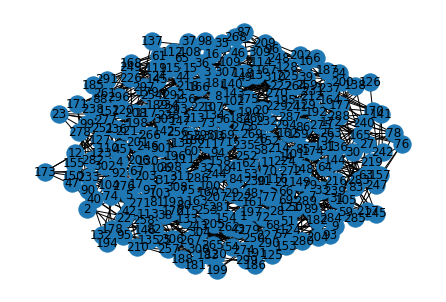

In [94]:
g=nx.Graph()
g.add_edges_from(v)
nx.draw(g,with_labels=1)

**La libreria de Networkx tambien nos permite obetener la matriz de adyacencia, ademas tambien debemos añadir que se llene la diagonal, es decir que para cada vertice tiene lazo**

In [95]:
m=nx.to_numpy_array(g)
for i in range(len(m)):
    m[i][i]=1
m

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

**Aqui solo vamos a definir el tamaño de poblacion, el numero de generaciones y el numero de cromosomas y mandamos llamar a la funcion algoritmo**

In [103]:
pob=10
gen=100
bits=312
algoritmo_g_a()

el mejor de la generacion  1  es:  [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  tiene cardinalidad :  163  